In [1]:
from IPython.display import Image

----------------------------------
#### Example - epsilon greedy k-Armed Bandit
----------------------------------

In [1]:
# import modules 
import numpy as np 
import matplotlib.pyplot as plt 

import pandas as pd 
%matplotlib inline

from lolviz import *

- define a class called `eps_bandit` 
    - `k`     - number of arms (int), 
    - `eps`   - probability of random action 0 < eps < 1 (float) 
    - `iters` - number of iterations 
    
- We’ll also define a term `mu` that we can use to adjust the average rewards of each of the arms.
    - mu: set the average rewards for each of the k-arms.
        - Set to "random" for the rewards to be selected from a normal distribution with mean = 0. 
        - Set to "sequence" for the means to be ordered from 0 to k-1.
        - Pass a list or array of length = k for user-defined values.

In [2]:
class eps_bandit:
    
    def __init__(self, k, eps, iters, mu='random'):
        
        self.k     = k               # Number of arms      
        self.eps   = eps             # Search probability
        self.iters = iters           # Number of iterations
        self.n     = 0               # Step count
        
        self.k_n         = np.zeros(k) # Step count for each arm (options)
        self.mean_reward = 0           # Total mean reward
        self.reward      = np.zeros(iters)
        
        self.k_reward = np.zeros(k)    # Mean reward for each arm
        
        if type(mu) == list: 
        # or type(mu).__module__ == np.__name__:     
            self.mu = np.array(mu)              # User-defined averages
        elif type(mu) == np.ndarray:
            self.mu = mu
        elif mu == 'random':
            self.mu = np.random.normal(0, 1, k) # Draw means from probability distribution
        elif mu == 'sequence':         
            self.mu = np.linspace(0, k-1, k)    # Increase the mean for each arm by one
        
    def pull(self):
        
        p = np.random.rand()                # Generate random number
        
        if self.eps == 0 and self.n == 0:   
            a = np.random.choice(self.k)    # beginning
        elif p < self.eps:      
            a = np.random.choice(self.k)    # Randomly select an action
        else:
            a = np.argmax(self.k_reward)    # Take greedy action
            
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n      += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n
        
        # Update results for Q(A)
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self):
        # Resets results while keeping settings
        self.n           = 0
        self.k_n         = np.zeros(k)
        self.mean_reward = 0
        self.reward      = np.zeros(iters)
        self.k_reward    = np.zeros(k)

Let’s set up some comparisons using different values of ϵ. 

For each of these, we’ll set k=10, run 1,000 steps for each episode and run 1,000 episodes. 

After each episode, we will reset the bandits and copy the averages across the different bandits to keep things consistent.

Explanation of code below ...

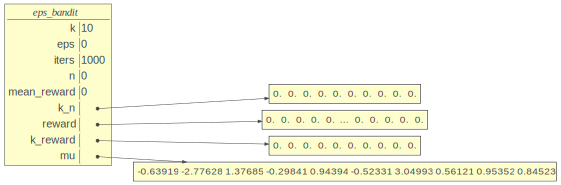

In [3]:
k     = 10
iters = 1000

eps_0  = eps_bandit(k, 0, iters)
objviz(eps_0)

In [4]:
type(eps_0.mu)

numpy.ndarray

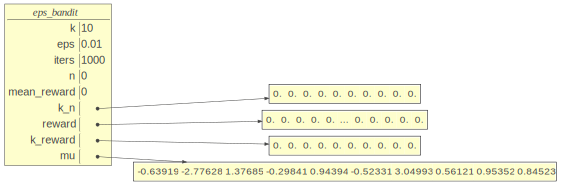

In [5]:
eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
objviz(eps_01)

#### 1. with mu = random

In [6]:
%%time
k     = 10
iters = 1000

eps_0_rewards  = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_05_rewards = np.zeros(iters)
eps_08_rewards = np.zeros(iters)
eps_10_rewards = np.zeros(iters)
eps_15_rewards = np.zeros(iters)
eps_25_rewards = np.zeros(iters)
eps_1_rewards  = np.zeros(iters)

episodes = 1000

# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0  = eps_bandit(k=k, eps=0,    iters=iters)
    eps_01 = eps_bandit(k=k, eps=0.01, iters=iters,  mu=eps_0.mu.copy())
    eps_05 = eps_bandit(k=k, eps=0.05,  iters=iters, mu=eps_0.mu.copy())
    eps_08 = eps_bandit(k=k, eps=0.08,  iters=iters, mu=eps_0.mu.copy())
    eps_10 = eps_bandit(k=k, eps=0.10,  iters=iters, mu=eps_0.mu.copy())
    eps_15 = eps_bandit(k=k, eps=0.15,  iters=iters, mu=eps_0.mu.copy())
    eps_25 = eps_bandit(k=k, eps=0.25,  iters=iters, mu=eps_0.mu.copy())
    eps_1  = eps_bandit(k=k, eps=1,     iters=iters, mu=eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_05.run()
    eps_08.run()
    eps_10.run()
    eps_15.run()
    eps_25.run()
    eps_1.run()
    
    # Update long-term averages
    eps_0_rewards  = eps_0_rewards  + (eps_0.reward  - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (eps_01.reward - eps_01_rewards) / (i + 1)
    eps_05_rewards = eps_05_rewards + (eps_05.reward - eps_05_rewards) / (i + 1)
    eps_08_rewards = eps_08_rewards + (eps_08.reward - eps_08_rewards) / (i + 1)
    eps_10_rewards = eps_10_rewards + (eps_10.reward - eps_10_rewards) / (i + 1)
    eps_15_rewards = eps_15_rewards + (eps_15.reward - eps_15_rewards) / (i + 1)
    eps_25_rewards = eps_25_rewards + (eps_25.reward - eps_25_rewards) / (i + 1)
    eps_1_rewards  = eps_1_rewards  + (eps_1.reward  - eps_1_rewards) / (i + 1)

Wall time: 2min 17s


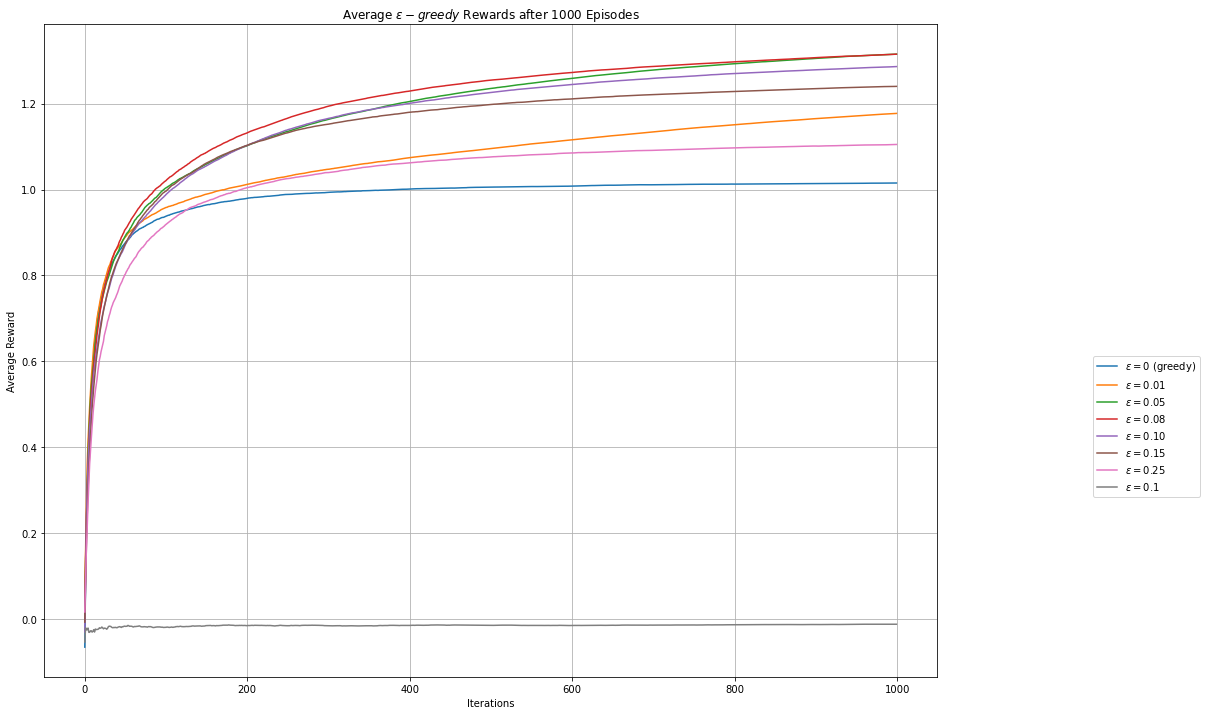

In [7]:
plt.figure(figsize=(16, 12))
plt.grid()
plt.plot(eps_0_rewards,  label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_05_rewards, label="$\epsilon=0.05$")
plt.plot(eps_08_rewards, label="$\epsilon=0.08$")
plt.plot(eps_10_rewards, label="$\epsilon=0.10$")
plt.plot(eps_15_rewards, label="$\epsilon=0.15$")
plt.plot(eps_25_rewards, label="$\epsilon=0.25$")
plt.plot(eps_1_rewards,  label="$\epsilon=0.1$")

plt.legend(bbox_to_anchor=(1.3, 0.5))

plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes)  + " Episodes");

Looking at the results, the greedy function under performs the other two consistently, with ϵ=0.01 coming in between the two and ϵ=0.1 performing the best of the three here.

#### 2. with mu = sequence

In [3]:
k = 10
iters = 1000

eps_0_rewards    = np.zeros(iters)
eps_01_rewards   = np.zeros(iters)
eps_1_rewards    = np.zeros(iters)
eps_0_selection  = np.zeros(k)
eps_01_selection = np.zeros(k)
eps_1_selection  = np.zeros(k)

episodes = 1000

# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters, mu='sequence')
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards +   (eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards +   (eps_1.reward - eps_1_rewards) / (i + 1)
    
    # Average actions per episode
    eps_0_selection = eps_0_selection +   (eps_0.k_n - eps_0_selection) / (i + 1)
    eps_01_selection = eps_01_selection + (eps_01.k_n - eps_01_selection) / (i + 1)
    eps_1_selection = eps_1_selection +   (eps_1.k_n - eps_1_selection) / (i + 1)

NameError: name 'eps_bandit' is not defined

NameError: name 'eps_0' is not defined

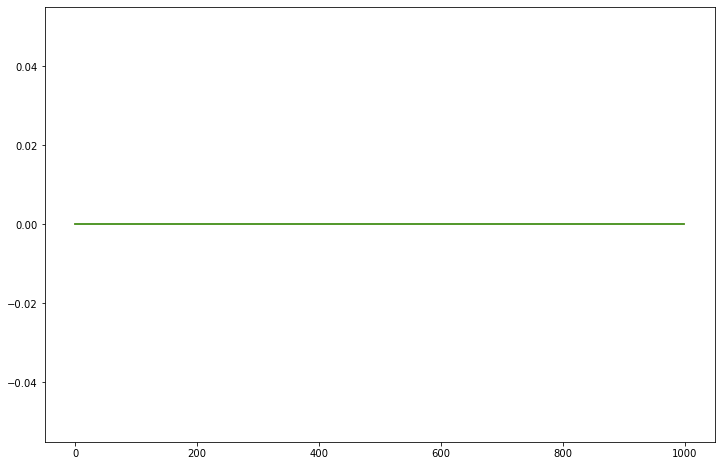

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")

for i in range(k):
    plt.hlines(eps_0.mu[i], xmin=0,
              xmax=iters, alpha=0.5,
              linestyle="--")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes) + " Episodes")

Text(0, 0.5, 'Number of Actions Taken')

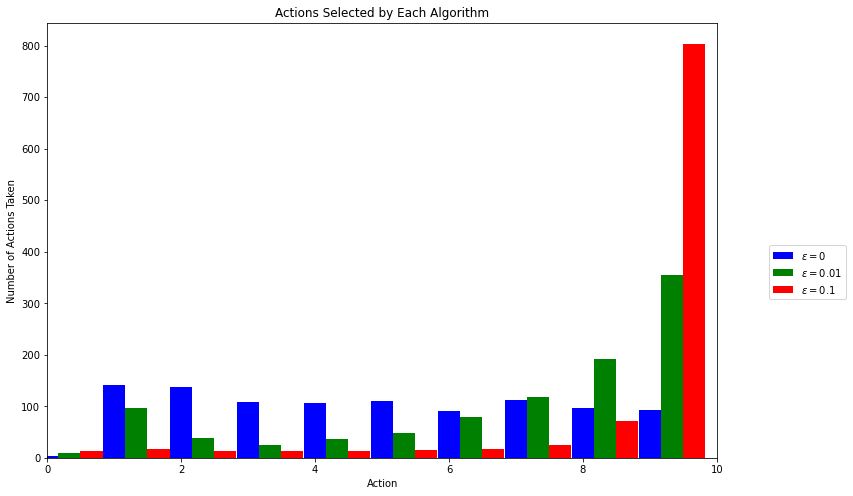

In [10]:
bins = np.linspace(0, k-1, k)

plt.figure(figsize=(12,8))
plt.bar(bins,      eps_0_selection,  width = 0.33, color='b', label="$\epsilon=0$")
plt.bar(bins+0.33, eps_01_selection, width = 0.33, color='g', label="$\epsilon=0.01$")
plt.bar(bins+0.66, eps_1_selection,  width=0.33,   color='r', label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlim([0,k])
plt.title("Actions Selected by Each Algorithm")
plt.xlabel("Action")
plt.ylabel("Number of Actions Taken")

In [28]:
opt_per = np.array([eps_0_selection, eps_01_selection,
                   eps_1_selection]) / iters * 100

df = pd.DataFrame(opt_per, 
                  index=['$\epsilon=0$', '$\epsilon=0.01$', '$\epsilon=0.1$'],
                  columns=["a = " + str(x) for x in range(0, k)])

print("Percentage of actions selected:")
df

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,0.3031,14.2518,14.1460,11.3991,8.9000,9.5000,9.7000,10.9000,11.3000,9.6000
$\epsilon=0.01$,1.0511,9.6560,3.3672,2.4170,3.1663,4.9071,6.5222,11.4752,20.9692,36.4687
$\epsilon=0.1$,1.3066,1.6943,1.2784,1.2220,1.3588,1.3991,1.7884,2.3850,6.4924,81.0750


- Viewing the average selection of the algorithms, we see why the `larger` $\epsilon$ value `performs well`, it takes the optimal selection 80% of the time.

- Play around with the different values of both $\epsilon$ and $k$ to see how these results change. 
    - For example, 
        - `decreasing the search space` would likely benefit smaller values of $\epsilon$ as exploration would be less beneficial and vice versa. 
        - `increasing the number of iterations` will begin to benefit the lower value of $\epsilon$ because it will have less random noise.